<h1><center><font size=10>Artificial Intelligence and Machine Learning </center></font></h1>

  <h1><center>Python Foundations: FoodHub Data Analysis
  </center></h1>
  

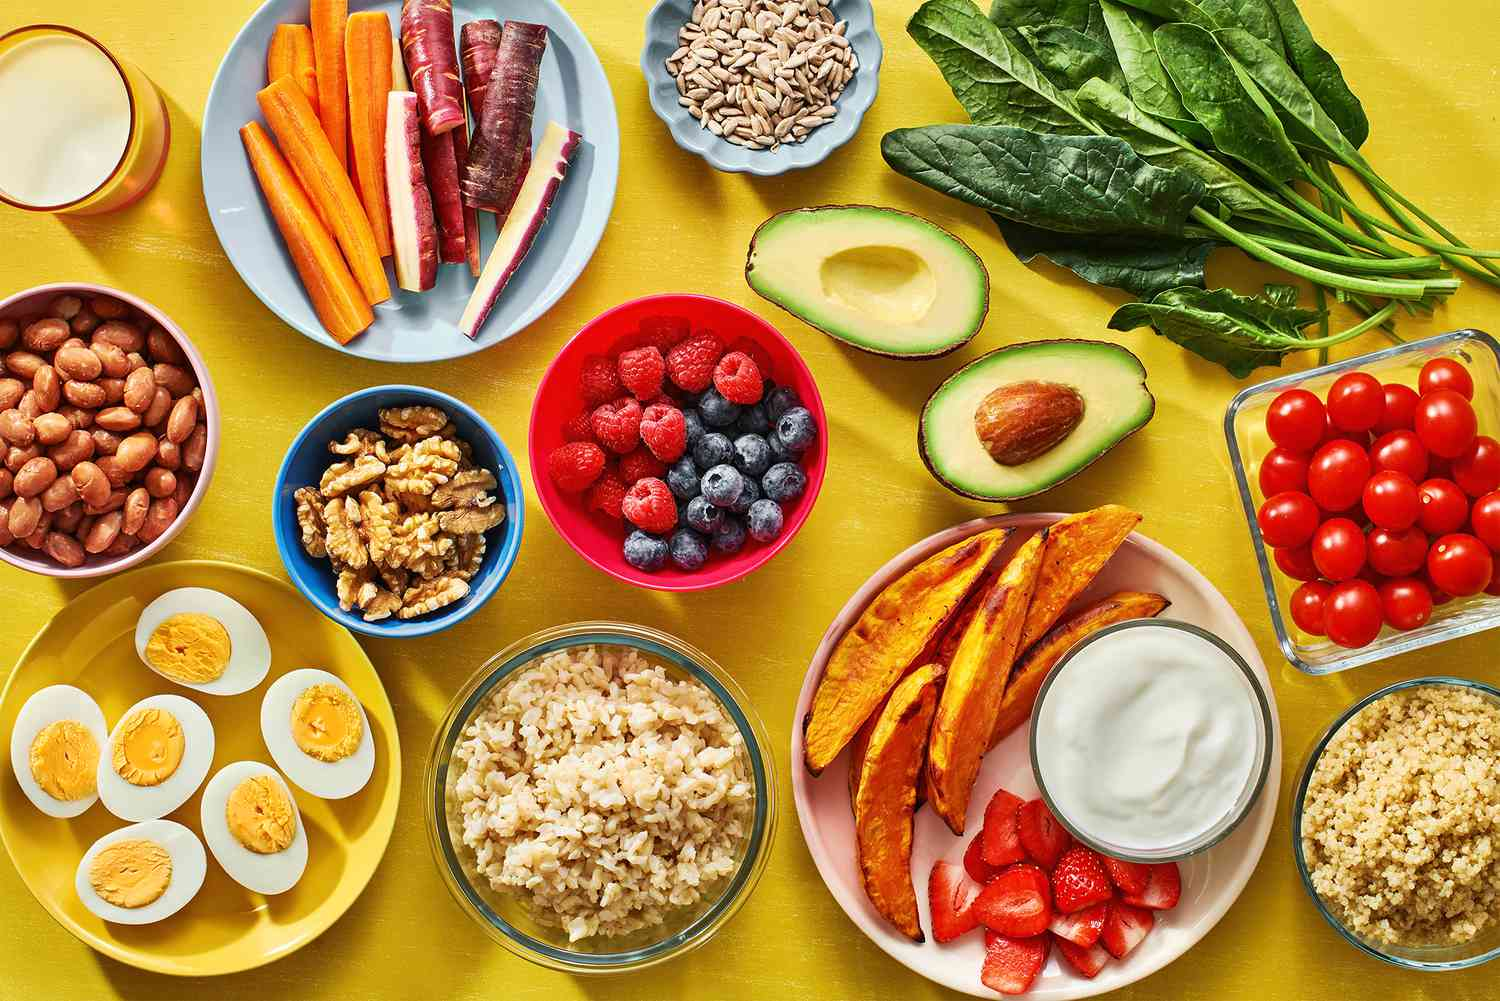

By Sweta Prasad

**Context**

The restaurant number is increasing in NY. Students and business professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service  provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

- The app allows the restaurants to receive a direct online order from a customer.
- The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant.
- The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food.
- The delivery person confirms the drop-off in the app after delivering the food package to the customer.
- The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

**Objective**

- The food aggregator company has stored the data of the different orders made by the registered customers in their online portal.
- They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.
- As a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.



**Data Overview: Data Properties and Type**:
 - The data is stored in comma separated file (.csv) named ‘foodhub_order.csv’, it contains 1898 rows, and 9 columns
 - It has details related to the food order organized in 9 columns

- order_id: Unique ID of the order (Data type: int64)
- customer_id: ID of the customer who ordered the food (Data type: int64)
- restaurant_name: Name of the restaurant  (Data type: object)
- cuisine_type: Cuisine ordered by the customer (Data type: object)
- cost_of_the_order: Cost of the order (Data type: float)
- day_of_the_week: Indicates whether the order is placed on a weekday or - weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday) (Data type: object)
- rating: Rating given by the customer for the order out of 5
- food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation(Data type: int64).
- delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information(Data type: int64).

There are four int64, one float64,  and four object datatypes


# Business Problem Overview and Solution Approach
 - Problem Statement
     - FoodHub is a food aggregator company which is trying to enhance it’s consumer experience based on a dataset compiled from customer orders

- Solution Approach
   
- In order to understand consumer behavior from the data, the following approach will be taken:
  -  Determine the type, attributes,  and quality of the data
   - Analyze the data and explore each variable in the dataset separately (univariate)
   -  Analyze data and their relationships (multivariate)
   - Draw conclusions based on the analyzed data

Import the required libraries

Libraries to help with reading and manipulating data

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Understanding the structure of the data¶
# from google.colab import drive
path= '/content/drive/MyDrive/foodhub_order.csv'
# drive.mount(path)
df=pd.read_csv(path)
df.head()



order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

In [ ]:
df.tail()

order_id  customer_id                        restaurant_name  \
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
1893        Mexican              22.31         Weekend          5   
1894       American              12.18         Weekend          5   
1895       Japanese              25.22         Weekday  Not given   
1896  Mediterranean              12.18         Weekday          5   
1897       Japanese              19.45         Weekend  Not given   

      food_preparation_time  delivery_time  
1893                     31             17  
1894                     31             19  
1895                     31             24  
1896                     23             31  
1897                     28             24

In [ ]:
# Check the shape of the dataset
print(df.shape)

(1898, 9)


There are 1898 rows and 9 columns in the data. The rows are for all the orders processed.

In [ ]:
print(df.columns)


Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


The data frame has dtypes: We have 1 float data type, 4 integers and 4 objects. Order ID, and Customer ID are also categorical variables with numerical labels. We may want to amend them accordingly dtypes: float64(1), int64(4), object(4).
The Rating column has the wrong data type. Order ID, and Customer ID are also categorical variables with numerical labels. We may want to amend them accordingly.

In [ ]:
# Checking the entries in the Rating Column
df['rating'].unique()


array(['Not given', '5', '3', '4'], dtype=object)

To change of data type, we can reassign the 'Not given' rating the number zero number. This will enable us to convert the rating column to a numeric data type without compromising the observations

In [ ]:
#Replace the not given value to 0
df['rating'] = df['rating'].replace(['Not given'],0)

# ..Then Change the data types accordingly

df = df.astype({"rating": float, "order_id": object, "customer_id": object})

#...Then confirm the data type has changed accordingly

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


In [ ]:
# Checking for missing values in the data (df.isnull().sum())
df.isnull().sum()





order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

# When we find null values, we can either:

1. Remove the null values
2. Keep the null values or Impute the data

Obsevation: No null values in the data frame, and it require no treatment.
And we did not have reviews for all the orders for whuch we repalced the 'Not given with 0





In [ ]:
 #write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into
 # write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
 # Use info() to print a concise summary of the DataFrame

df['restaurant_name'] = df.restaurant_name.astype('category')
df['cuisine_type'] = df.cuisine_type.astype('category')
df['day_of_the_week'] = df.day_of_the_week.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   object  
 1   customer_id            1898 non-null   object  
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   float64 
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(2), int64(2), object(2)
memory usage: 102.7+ KB


In [ ]:
# summary statistics of the numerical data.
df.describe().round(2).T

## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

count   mean   std    min    25%    50%   75%    max
cost_of_the_order      1898.0  16.50  7.48   4.47  12.08  14.14  22.3  35.41
rating                 1898.0   2.66  2.20   0.00   0.00   4.00   5.0   5.00
food_preparation_time  1898.0  27.37  4.63  20.00  23.00  27.00  31.0  35.00
delivery_time          1898.0  24.16  4.97  15.00  20.00  25.00  28.0  33.00

In [ ]:
df.describe().round(2)



cost_of_the_order   rating  food_preparation_time  delivery_time
count            1898.00  1898.00                1898.00        1898.00
mean               16.50     2.66                  27.37          24.16
std                 7.48     2.20                   4.63           4.97
min                 4.47     0.00                  20.00          15.00
25%                12.08     0.00                  23.00          20.00
50%                14.14     4.00                  27.00          25.00
75%                22.30     5.00                  31.00          28.00
max                35.41     5.00                  35.00          33.00

 Observations: Above output, there are 25% of the observations cost 12.08 or below, with no rating.

 It takes about 23 minutes or less to prepare and 20 minutes or less to deliver, 50% have values below 14.140000 cost of order, rating  4, food preparation time 27 minutes and delivery time 25 minutes.

 For 75% we value below  22.29 cost of order, 5 rating,31 food preparatin time and 28 delivery time for the same parameters.

In [ ]:
#complete the code & check the rating value
df.rating.value_counts(1).round(2).T


0.0    0.39
5.0    0.31
4.0    0.20
3.0    0.10
Name: rating, dtype: float64

In [ ]:
df['rating'].value_counts(dropna=False)

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

Observations:

Having converted the rating 'Not given'= 0, count of 0 represent the same hence

736 order were not rated. That is 39%.

In [ ]:
df.duplicated().sum()

0

There is no duplicate in the data.

*Exploratory Data Analysis

1.  Univariate Analysis
2.  Multivariate Analysis



# Univariate Analysis



Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

Restaurant name

In [ ]:
# check unique Restaurant Name
print('These are', df['restaurant_name'].unique() ) ## Complete the code to find out number of unique Restaurant Name
print('There are',df['restaurant_name'].nunique(),'Restaurants')

These are ['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana', 'Blue Ribbon Fried Chicken', 'Dirty Bird to Go', ..., 'Rye House', 'Hiroko's Place', 'Frank Restaurant', 'Sarabeth's West', ''wichcraft']
Length: 178
Categories (178, object): [''wichcraft', '12 Chairs', '5 Napkin Burger', '67 Burger', ..., 'brgr',
                           'da Umberto', 'ilili Restaurant', 'indikitch']
There are 178 Restaurants


Cuisine Type

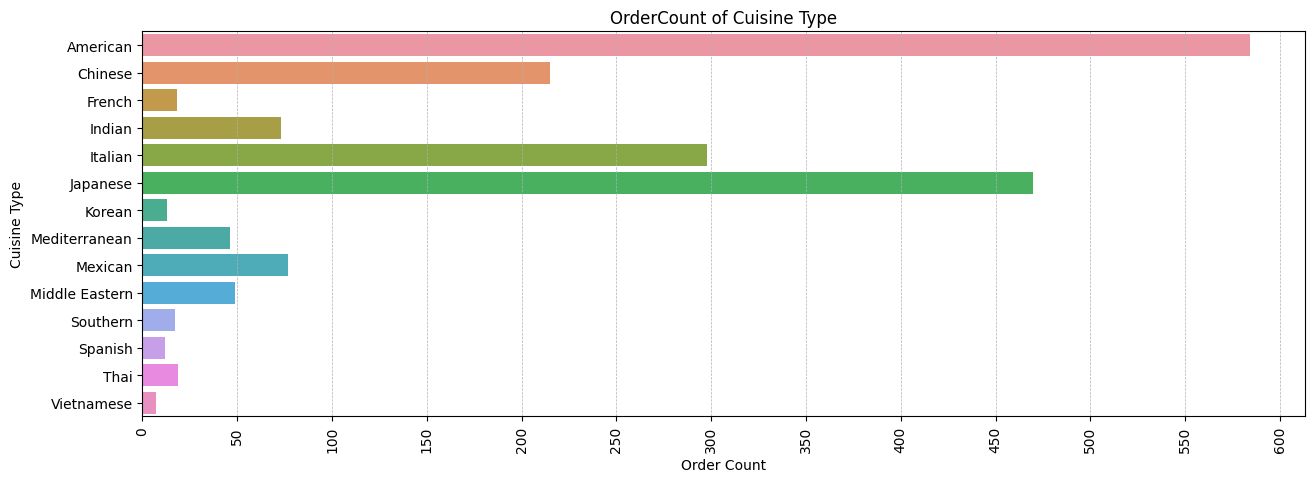

In [ ]:
# Create a countplot for cuisine type.
plt.figure(figsize = (15,5))
sns.countplot(data = df, y = 'cuisine_type')
plt.xlabel('Order Count')
plt.ylabel('Cuisine Type')
plt.xticks(np.arange(0,650,50))
plt.title('OrderCount of Cuisine Type')
plt.grid(axis ='x', linestyle= '--', linewidth = 0.5)
plt.xticks(rotation=90)
plt.show()





In [ ]:
# Checking unique cuisine types.
print(df['cuisine_type'].nunique(),'Cuisine types.')
print(df.cuisine_type.value_counts().reset_index())


14 Cuisine types.
             index  cuisine_type
0         American           584
1         Japanese           470
2          Italian           298
3          Chinese           215
4          Mexican            77
5           Indian            73
6   Middle Eastern            49
7    Mediterranean            46
8             Thai            19
9           French            18
10        Southern            17
11          Korean            13
12         Spanish            12
13      Vietnamese             7


In [ ]:
# using value counts normalize to get percentage distribution
print(df['cuisine_type'].value_counts(normalize=True)*100)

American          30.769231
Japanese          24.762908
Italian           15.700738
Chinese           11.327713
Mexican            4.056902
Indian             3.846154
Middle Eastern     2.581665
Mediterranean      2.423604
Thai               1.001054
French             0.948367
Southern           0.895680
Korean             0.684932
Spanish            0.632244
Vietnamese         0.368809
Name: cuisine_type, dtype: float64


Obseravations on cuisine Type:


*   The most popular cuisine are American(30.76%), Japanese(24.76),

 Italian(15.70%) and Chinese(11.33%), Mexican(4.05%).

*   Vietnamese (0.36%) is least ordered cuisine.


*   There is almost a tie between Indian(3.84%) and Mexican(4.05%).





# Cost of the order

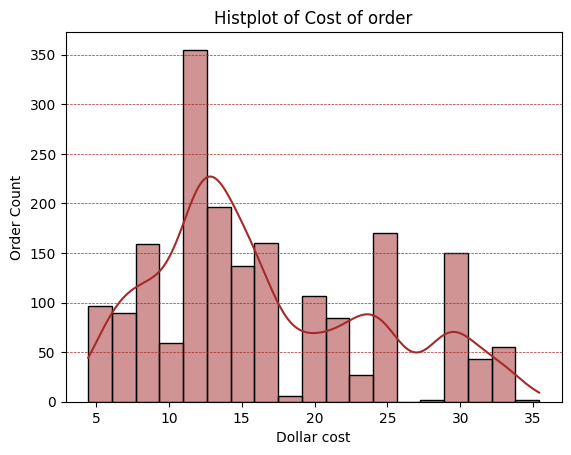

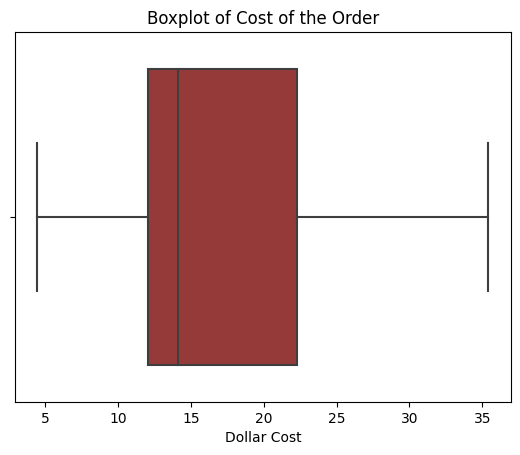

In [ ]:
sns.histplot(data=df,x='cost_of_the_order',kde=True, color='brown') ## Histogram for the cost of order
plt.xlabel('Dollar cost')
plt.ylabel('Order Count')
plt.title('Histplot of Cost of order')
plt.grid(axis = 'y', color = 'brown', linestyle = '--', linewidth = 0.5)
plt.show()



sns.boxplot(data=df,x='cost_of_the_order', color='brown') ## Boxplot for the cost of order
plt.xlabel('Dollar Cost')
plt.title('Boxplot of Cost of the Order')
plt.show()

In [ ]:
#describe to get numerical summary
df.cost_of_the_order.describe().round(2).T

count    1898.00
mean       16.50
std         7.48
min         4.47
25%        12.08
50%        14.14
75%        22.30
max        35.41
Name: cost_of_the_order, dtype: float64

**Observations on Cost of orders**


* The data appears to be consistent.
* The boxplot indicates that the median cost is about 14.14 dollars,
  with the orders being right skewed.
* The mean is 16.50 dollars.The mean is greater than the mdeian.
* The min is 4.47 dollars.   
* The max is 35.41 dollars.












# **Day of the week**

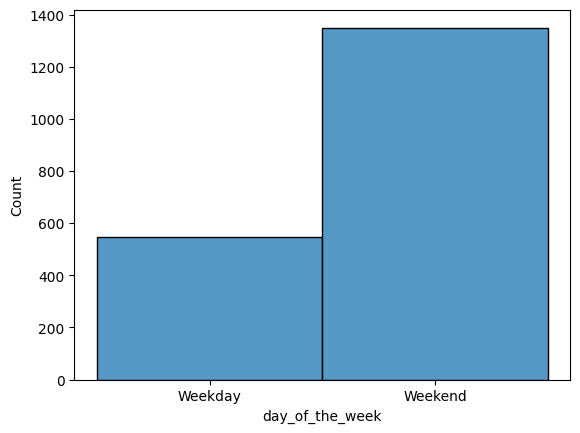

In [ ]:
# # Check the unique values

df['day_of_the_week'].nunique()
sns.histplot(data=df, x='day_of_the_week')
plt.show()

## Complete the code to check unique values for the 'day_of_the_week' column

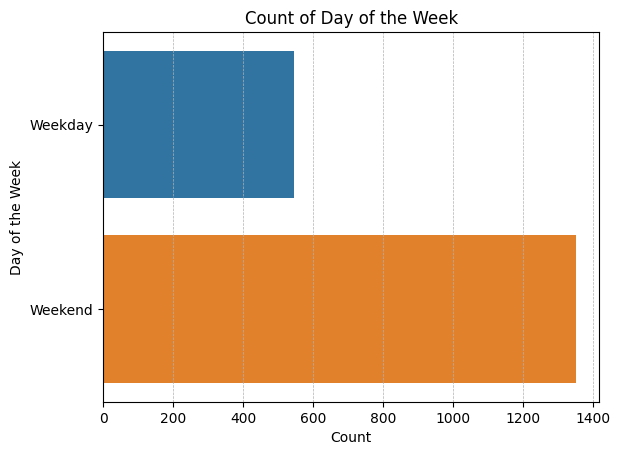

In [ ]:
df['day_of_the_week'].unique()
sns.countplot(data=df, y='day_of_the_week')
plt.xlabel('Count')
plt.ylabel('Day of the Week')
plt.title('Count of Day of the Week')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)
plt.show()
## Complete the code to plot a bar graph for 'day_of_the_week' column

In [ ]:
df.day_of_the_week.value_counts(1)*100.

Weekend    71.18019
Weekday    28.81981
Name: day_of_the_week, dtype: float64

 **Observation on Day of the Week**

There is more order on over the weekend(71%) as compared to weekdays (almost 29%).

# **Rating**

In [ ]:
 #Return the unique values for the rating category
df['rating'].unique()

array([0., 5., 3., 4.])

In [ ]:
#the number of entries of each rating
df['rating'].value_counts()

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

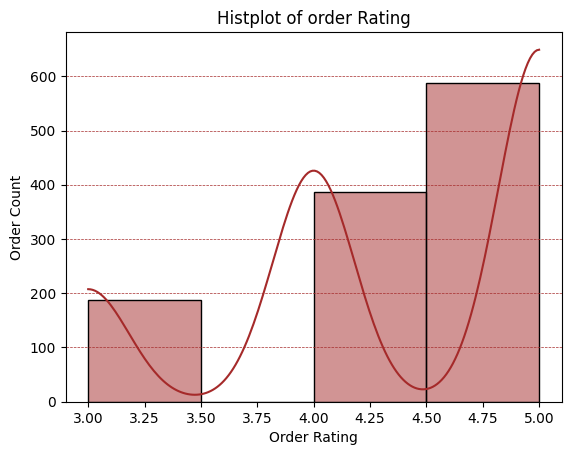

In [ ]:
# Check the unique values
# Complete the code to check unique values for the 'rating' column


df5 = df[df['rating']!= 0]

sns.histplot(data = df5, x='rating',bins = 4,stat = 'count',kde = True, color='brown')
plt.xlabel('Order Rating')
plt.ylabel('Order Count')
plt.title('Histplot of order Rating')
plt.grid(axis = 'y', color= 'brown', linestyle= '--', linewidth = 0.5 )
plt.show()

#sns.boxplot(data=df5, x='rating')

#sns.boxplot(data = df, x='rating')
#plt.xlabel('Order Rating')
#plt.title('Boxplot of Order Rating')
plt.show();


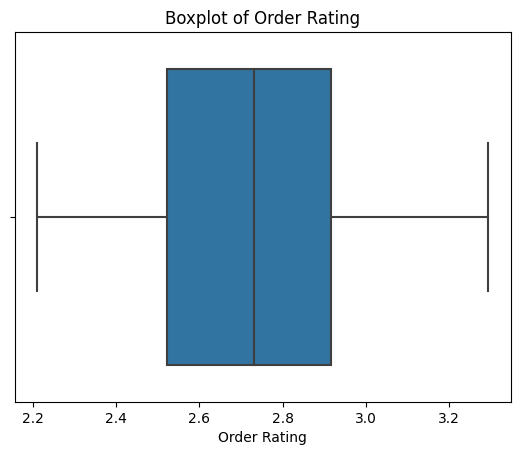

In [ ]:
#  Get rid of Not given ratings so that we can have a valid dataset for rating
df['valid_rating'] = df['rating'].replace('Not given', np.nan).astype(float)

# Grouping valid rating by restaurants
df['valid_rating'] = df['valid_rating'].fillna(value = df.groupby(['restaurant_name'])['valid_rating'].transform('mean'))

# Define a dataframe by cusine type with valid rating
df_valid = df.groupby(['cuisine_type'])['valid_rating'].mean().sort_values(ascending=False).reset_index()




sns.boxplot(data=df_valid, x='valid_rating')


plt.xlabel('Order Rating')
plt.title('Boxplot of Order Rating')
plt.show();

In [ ]:
df['valid_rating'].describe()

count    1898.000000
mean        2.659642
std         2.195280
min         0.000000
25%         0.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: valid_rating, dtype: float64

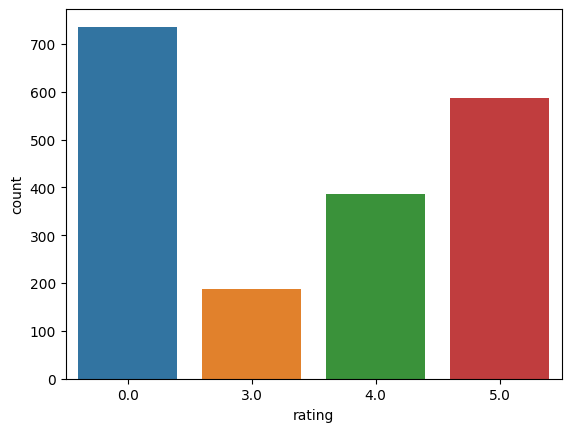

In [ ]:
df['rating'].nunique()
sns.countplot(data = df, x='rating')
plt.show()
## Complete the code to plot bar graph for 'rating' column

# **Observations on Rating:**
Many orders on FoodHub did not receive a rating. Out of the orders that were rated, majority of them received a 5 point rating and the fewest amount of orders received a 3 point rating.

# **Food Preparation Time**

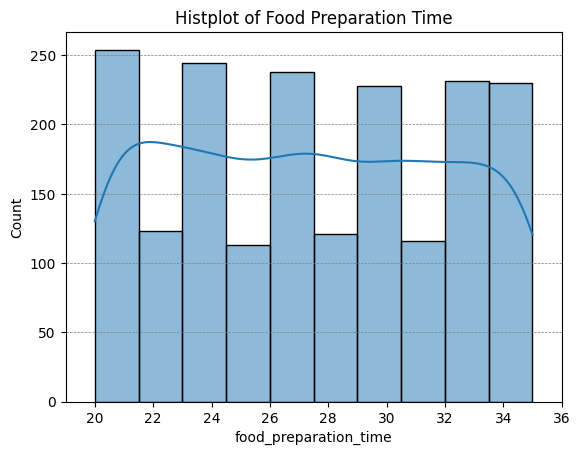

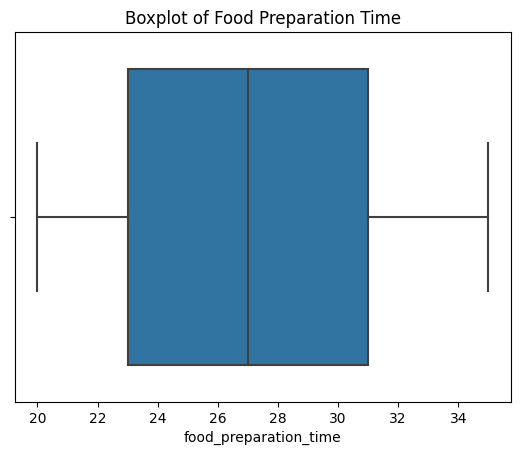

In [ ]:
sns.histplot(data = df, x='food_preparation_time',bins = 10,
stat = 'count',kde = True )
plt.title('Histplot of Food Preparation Time')
plt.grid(axis = 'y', linestyle = '--', color= 'gray', linewidth = 0.5)
plt.xlim(19,36)
plt.show()

sns.boxplot(data=df,x='food_preparation_time')
plt.title('Boxplot of Food Preparation Time')
plt.show()
## Complete the code to plot the histogram for the cost of order

## Complete the code to plot the boxplot for the cost of order

In [ ]:
df.food_preparation_time.describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

**Observation on Food preparation Time**

There is a fairly even distributiuoin of the time.

* The data appears to be consistent.

*  Median food preparation time is approx 27.0 mins, while Mean is at 27.3 mins.

* Min food preparation time is 20 minutes median of about 27 minutes

* while food preparation time  max is 35 mins.


   








** Food Delivery Time¶**

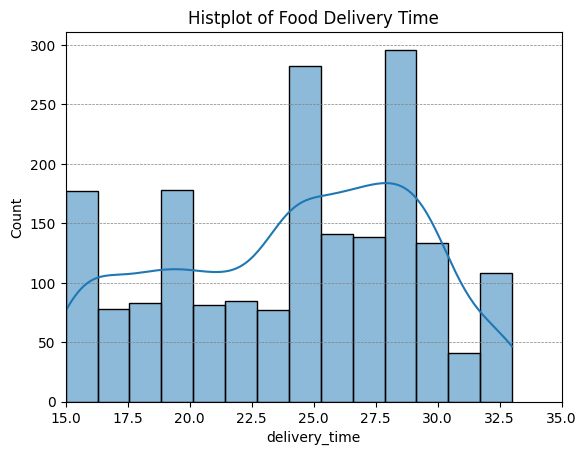

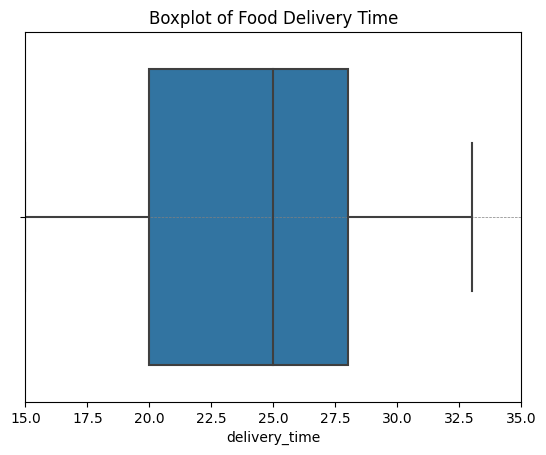

In [ ]:
sns.histplot(data=df,x='delivery_time', stat='count', kde=True) ## Complete the code to plot the histogram for the delivery time
plt.title('Histplot of Food Delivery Time')
plt.grid(axis = 'y', linestyle = '--', color= 'gray', linewidth = 0.5)
plt.xlim(15,35)
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.title('Boxplot of Food Delivery Time')
plt.grid(axis = 'y', linestyle = '--', color= 'gray', linewidth = 0.5)
plt.xlim(15,35)
plt.show()

In [ ]:
# checking describe to get numerical summary
df.delivery_time.describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

### **Observation on  Food Delvery Time:**
The median delivery time is about 25 minutes with the observations being skewed to the left.


* The data appears to be consistent
* The average delivery time is 24.16 minutes.
* Median delivery time is 25.0 minutes.
* The max delivery time is 33 minutes  







From the histplot we can determine that most orders take between 25 and 28 minutes to be delivered.





Let's check which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Get top 5 restaurants with highest number of orders
df.groupby("restaurant_name")["order_id"].count().sort_values(ascending=False)[:5]
## Complete the code

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

# Observations the top 5 restaurants in terms of the number of orders:

* Shake Shack is the leading resturant with 219 orders.

* The Meatball Shop is the 2nd leading resturant with 132 orders.

* Blue Ribbon Sushi(order:119),

* Blue Ribbon Fried Chicken(order:96)

* Parm (order:68)

These are the top 5 restuarnt in terms of the number of orders received.

In [ ]:
#df_weekend = df[df['day_of_the_week'] == 'Weekend'].groupby('cusine_type').count().sort_values(by =order_id, axis= 0, ascending= False).head(5) )
#df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)
#df_weekend['cuisine_type'].value_counts()
df[df.day_of_the_week == 'Weekend'].cuisine_type.value_counts().iloc[0:5]


American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

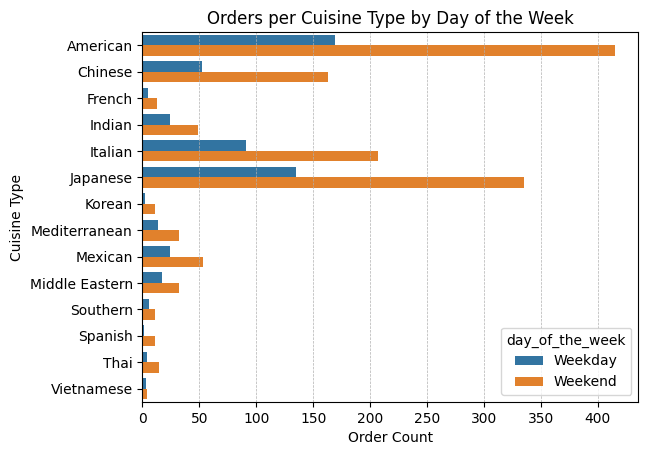

In [ ]:
sns.countplot(data=df, y='cuisine_type', hue='day_of_the_week')
plt.xlabel('Order Count')
plt.ylabel('Cuisine Type')
plt.title('Orders per Cuisine Type by Day of the Week')
plt.grid(axis = 'x',  linestyle = '--', linewidth = 0.5)
plt.show()

**Observation**

* The American cuisine type is the most popular cuisine during weekend with  415 orders.
* Across all the cuisine types, orders on weekend are more than orders on weekday.


In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]
## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


In [ ]:
df_less_than_20 = df[df['cost_of_the_order']<20]
print('The number of total orders that cost less than  20 dollars is:', df_less_than_20.shape[0])
percentage = (df_less_than_20.shape[0] / df.shape[0]) * 100
print("Percentage of orders less than 20 dollars:", round(percentage, 2), '%')


The number of total orders that cost less than  20 dollars is: 1343
Percentage of orders less than 20 dollars: 70.76 %


 Observations

* The Percentage of orders that cost above 20 dollars = 29.24 %

* The Percentage of orders less than 20 dollars = 70.76 %

In [ ]:
# Get the mean delivery time
mean_delivery_time = df['delivery_time'].mean()
mean_delivery_time
print('Average delivery time is', round(mean_delivery_time,2), 'minutes')

 ## Write the appropriate function to obtain the mean delivery time

#print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

Average delivery time is 24.16 minutes


Observations:

**The mean order delivery time is 24.16 minutes.**

In [ ]:
 #Get the counts of  each customer_id
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(3)
## Write the appropriate column name to get the top 3 cmost frequent customers

order_id
customer_id          
52832              13
47440              10
83287               9

** Observations**

*   The IDs of the three most frequent customers are  52832,  47440,  83287   and the number of orders 13, 10, 9.List item

*  There is a tie of four clients with the 5th highest order count.
 The comapny has to make a decision on how to address the multiple
 customers with the same qualifying score.

Else they should provision to reward 8 customers instead of 5.













# Multivariate Analysis



In [ ]:
# checking how many restaurants serve multiple cuisine types
df.groupby(['restaurant_name'])['cuisine_type'].nunique().sort_values(ascending=False).head(10)

restaurant_name
The Meatball Shop            2
'wichcraft                   1
Pepe Rosso To Go             1
Piccolo Angolo               1
Pinto Nouveau Thai Bistro    1
Pongsri Thai                 1
Posto                        1
Prosperity Dumpling          1
Pylos                        1
Ravagh Persian Grill         1
Name: cuisine_type, dtype: int64

9 restaurants only serve 1 cuisine, except the meatball shop, which serves 2.


 **Now let's check how many number of Restaurants per Cuisine **

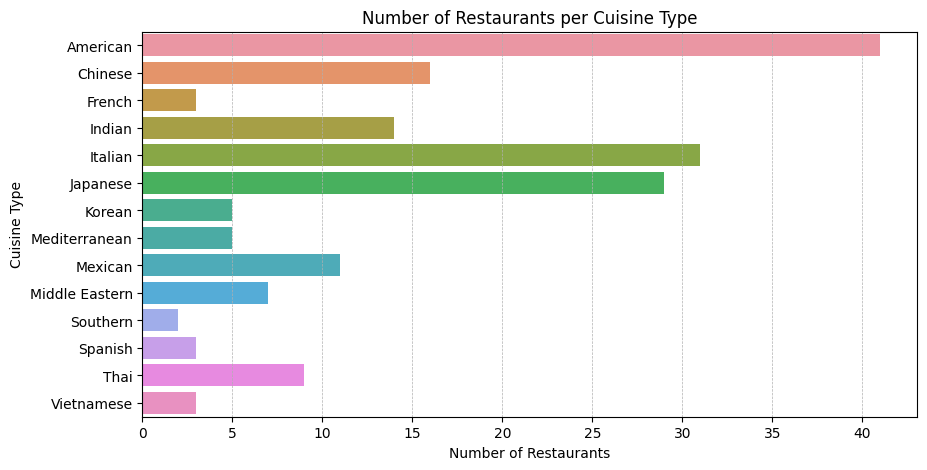

cuisine_type  restaurant_count
0         American                41
1          Italian                31
2         Japanese                29
3          Chinese                16
4           Indian                14
5          Mexican                11
6             Thai                 9
7   Middle Eastern                 7
8           Korean                 5
9    Mediterranean                 5
10          French                 3
11         Spanish                 3
12      Vietnamese                 3
13        Southern                 2

In [ ]:
# checking how many restaurants per cuisine types
df1 = df.groupby(['cuisine_type'])['restaurant_name'].nunique().sort_values(ascending=False).reset_index()
df1.rename(columns={'restaurant_name': 'restaurant_count'}, inplace=True)

# checking barplot of number of restaurants per cuisine
plt.figure(figsize=(10,5))
sns.barplot(data=df1, y='cuisine_type', x='restaurant_count')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.title('Number of Restaurants per Cuisine Type')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)
plt.show()
df1.head(14)



American Cuisine has the most number of restaurants, followed by Italian and Japanese.



**Now check the order count per cuisine and cross reference it with number of restaurants per cuisine, which could tell us average order per restaurant per cuisine.**


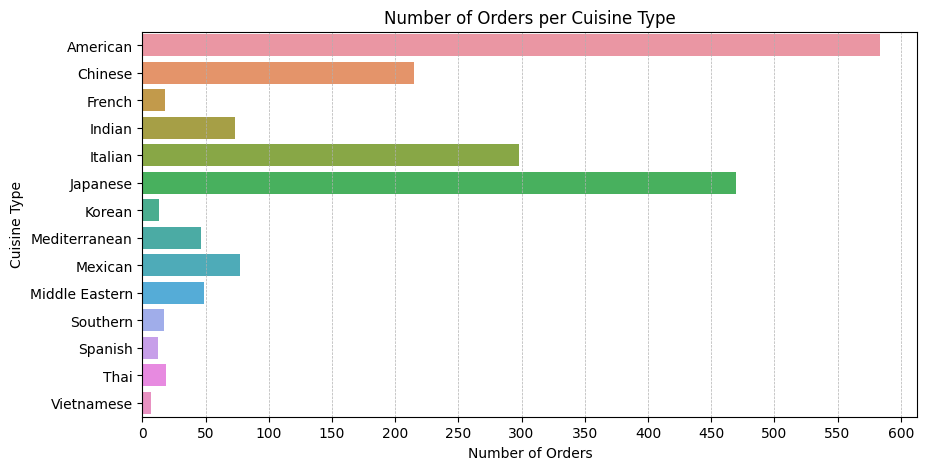

cuisine_type  order_count
0         American          584
1         Japanese          470
2          Italian          298
3          Chinese          215
4          Mexican           77
5           Indian           73
6   Middle Eastern           49
7    Mediterranean           46
8             Thai           19
9           French           18
10        Southern           17
11          Korean           13
12         Spanish           12
13      Vietnamese            7

In [ ]:
# checking order count per cuisine
df2 = df.groupby(['cuisine_type'])['order_id'].nunique().sort_values(ascending=False).reset_index()
df2.rename(columns={'order_id': 'order_count'}, inplace=True)

# checking barplot of order count vs cuisines
plt.figure(figsize=(10,5))
sns.barplot(data=df2, y='cuisine_type', x='order_count')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.xticks(np.arange(0,650,50))
plt.title('Number of Orders per Cuisine Type')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)
plt.show()

df2.head(14)

In [ ]:
#the total orders correspond to the toal entries in the dataframe
df['order_id'].nunique()


1898

**The total order correspond to the toatal entries in the dataframe is 1898. **

* American Cuisine has the most number of orders, followed by Japanese and Italian.

* Another noticeable things is that although Japanese had 3rd most number of restaurants, it has 2nd most number of orders.

**Now we will also add avg. rating per cuisine**

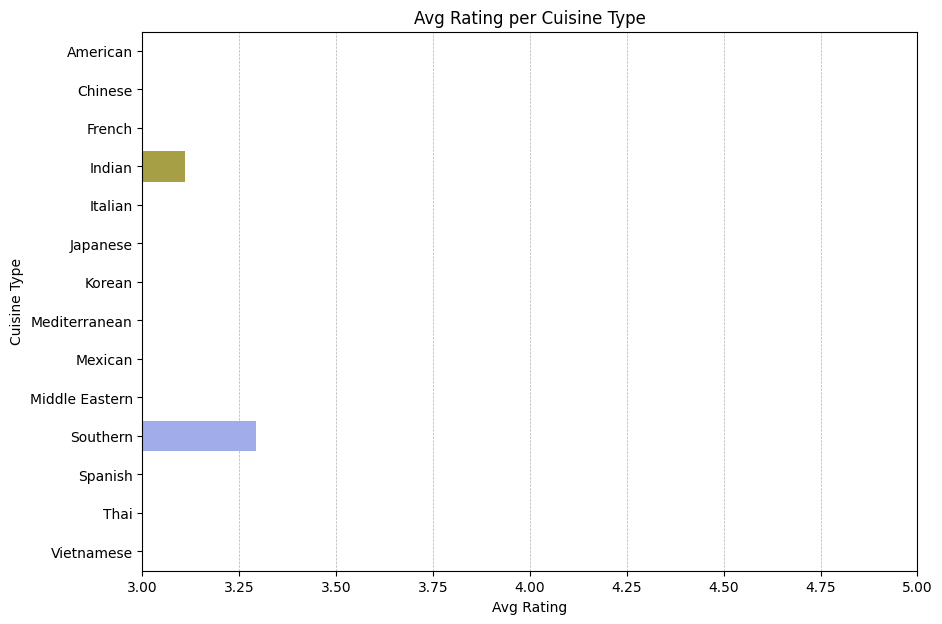

cuisine_type  rating_new
0         Southern    3.294118
1           Indian    3.109589
2   Middle Eastern    2.938776
3    Mediterranean    2.934783
4       Vietnamese    2.857143
5           Korean    2.846154
6          Mexican    2.753247
7         American    2.708904
8          Chinese    2.683721
9         Japanese    2.540426
10         Italian    2.516779
11         Spanish    2.416667
12          French    2.388889
13            Thai    2.210526

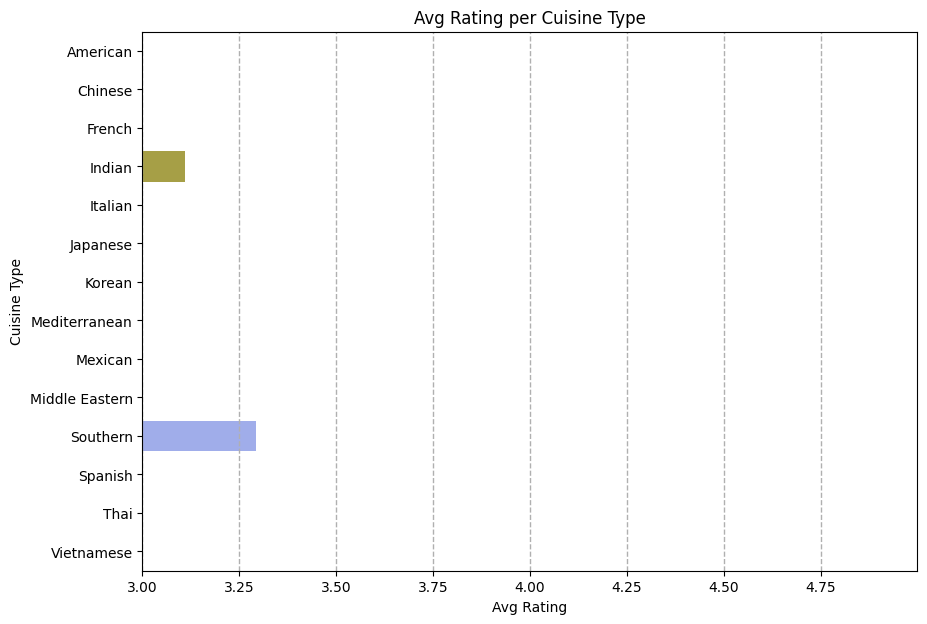

cuisine_type  valid_rating
0         Southern      3.294118
1           Indian      3.109589
2   Middle Eastern      2.938776
3    Mediterranean      2.934783
4       Vietnamese      2.857143
5           Korean      2.846154
6          Mexican      2.753247
7         American      2.708904
8          Chinese      2.683721
9         Japanese      2.540426
10         Italian      2.516779
11         Spanish      2.416667
12          French      2.388889
13            Thai      2.210526

In [ ]:
#  Get rid of Not given ratings so that we can have a valid dataset for rating
df['valid_rating'] = df['rating'].replace('Not given', np.nan).astype(float)

# Grouping valid rating by restaurants
df['valid_rating'] = df['valid_rating'].fillna(value = df.groupby(['restaurant_name'])['valid_rating'].transform('mean'))

# Define a dataframe by cusine type with valid rating
df_valid = df.groupby(['cuisine_type'])['valid_rating'].mean().sort_values(ascending=False).reset_index()


# checking barplot of avg rating per cuisine type
plt.figure(figsize=(10,7))
sns.barplot(data=df_valid, y='cuisine_type', x='valid_rating')
plt.xlabel('Avg Rating')
plt.ylabel('Cuisine Type')
plt.xlim(3,5)
plt.xticks(np.arange(3,5,.25))
plt.title('Avg Rating per Cuisine Type')
plt.grid(axis = 'x', linestyle = '--', linewidth = 1)
plt.show()

df_valid.head(14)

Cuisine vs Cost of the order

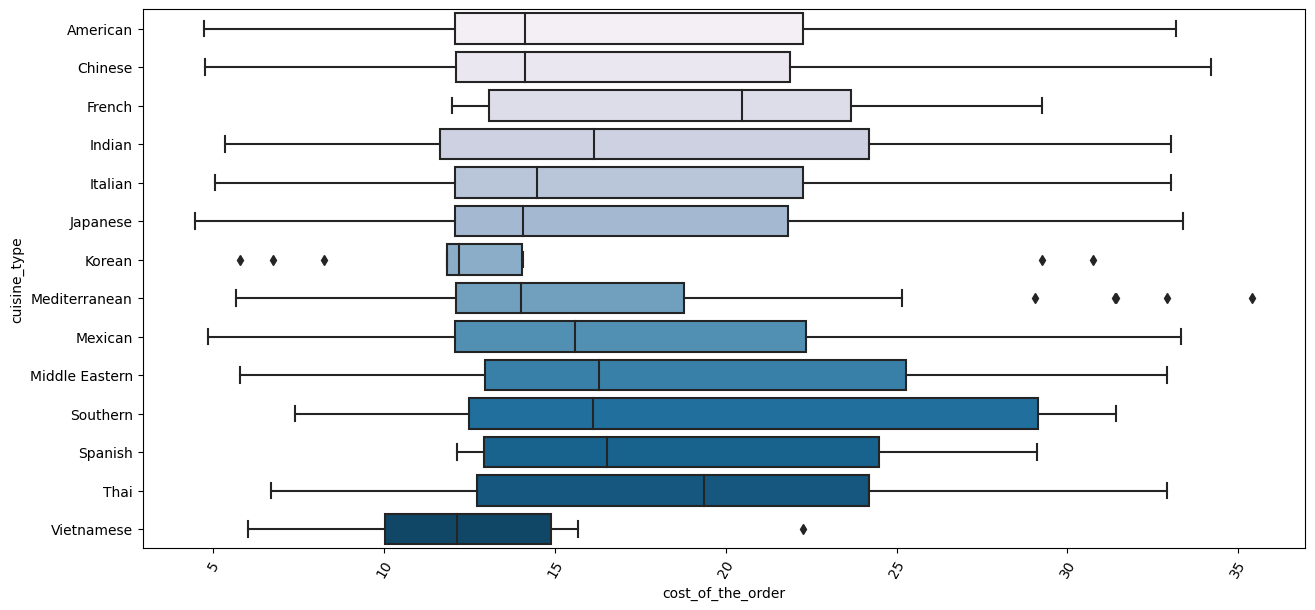

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(y = "cuisine_type", x = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()



**Observations on Cost of order**:

1.Most cuisines have varying degrees of skewed costs

2.Having outliers such as Korean, Mediterranean and Vietnamese



Cuisine vs Food Preparation time

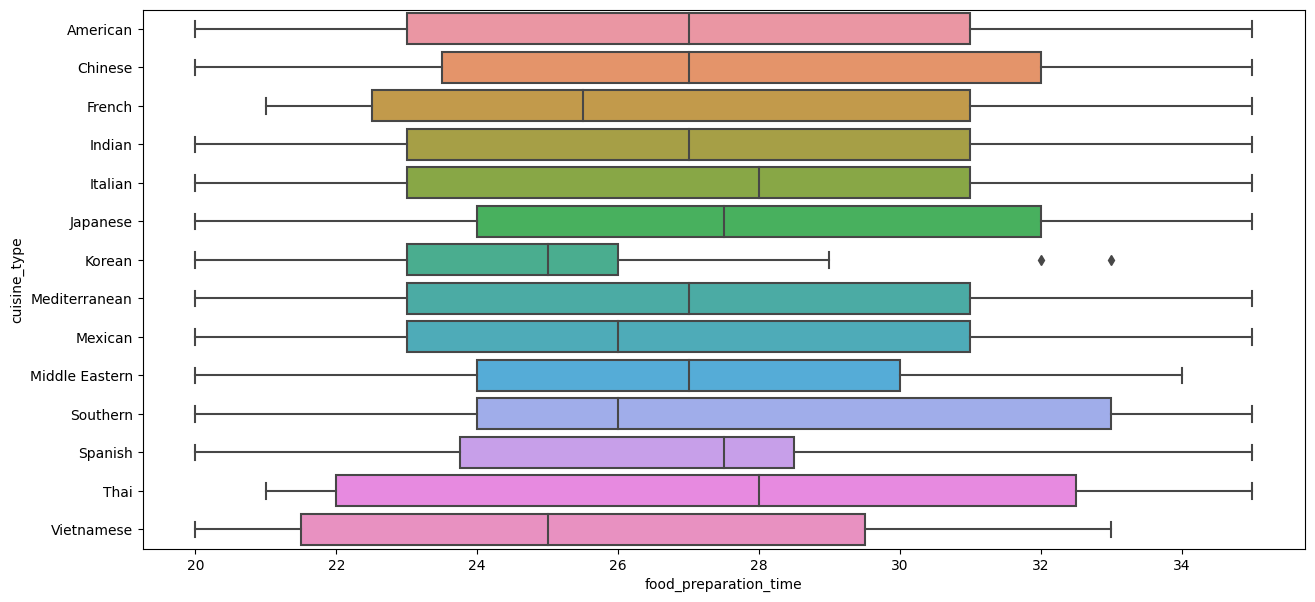

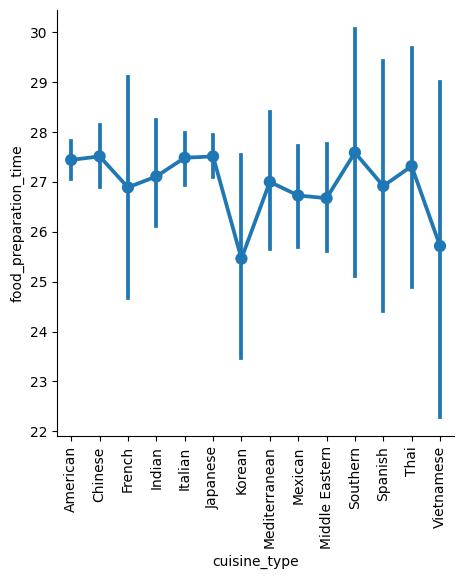

In [ ]:
# Relationship between food preparation time and cuisine type
## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.figure(figsize=(15,7))
sns.boxplot(data = df, y = 'cuisine_type', x = 'food_preparation_time')
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show()



Observations

 - Most cuisine types have more or less the same average preparation time although some have a larger spread of the 95% confidence interval.


Day of the Week vs Delivery time


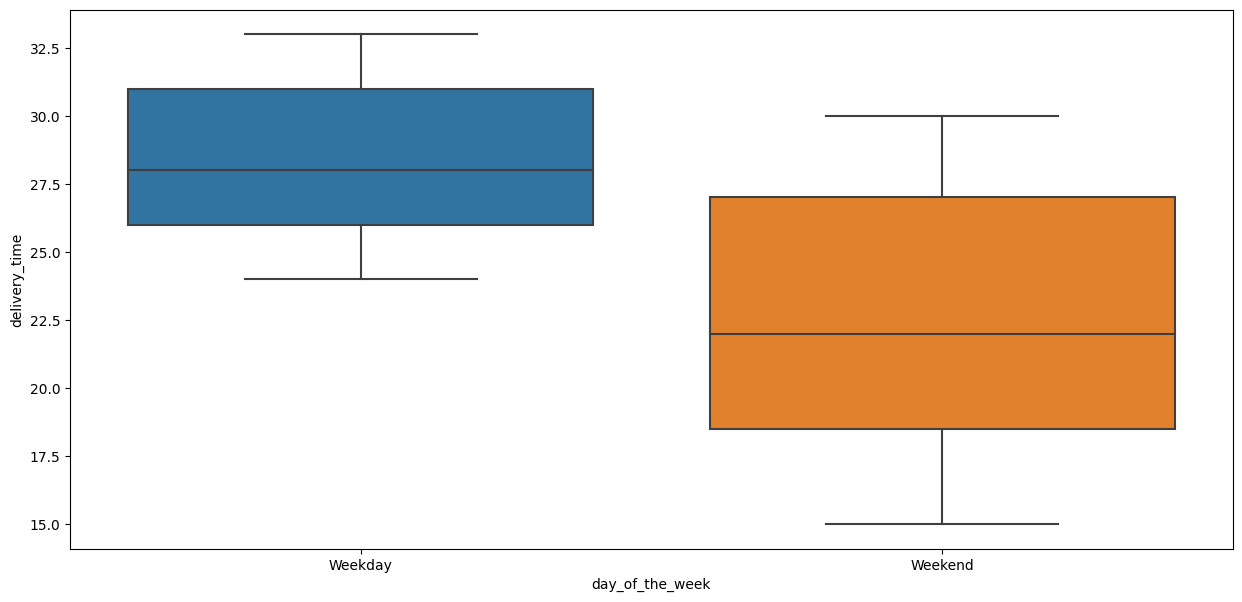

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x='day_of_the_week',y='delivery_time')
plt.show()
## Complete the code to visualize the relationship between day of the week and delivery time using boxplot


In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

Rating vs Delivery time

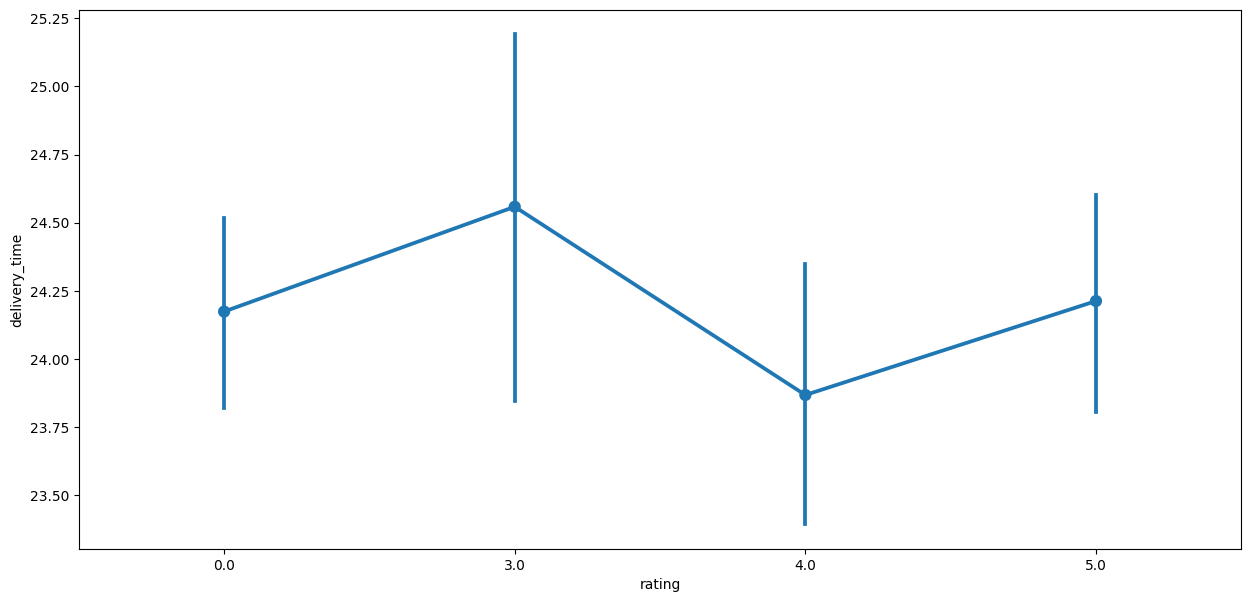

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

Rating vs Food preparation time

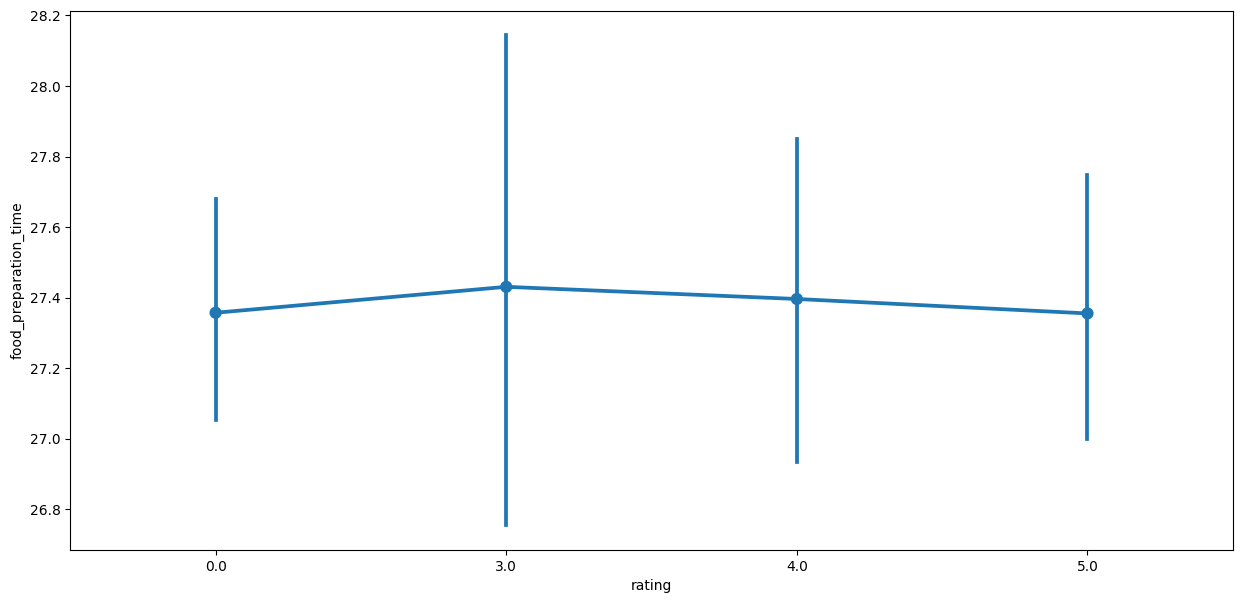

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data= df, x='rating', y='food_preparation_time',)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

Rating vs Cost of the order

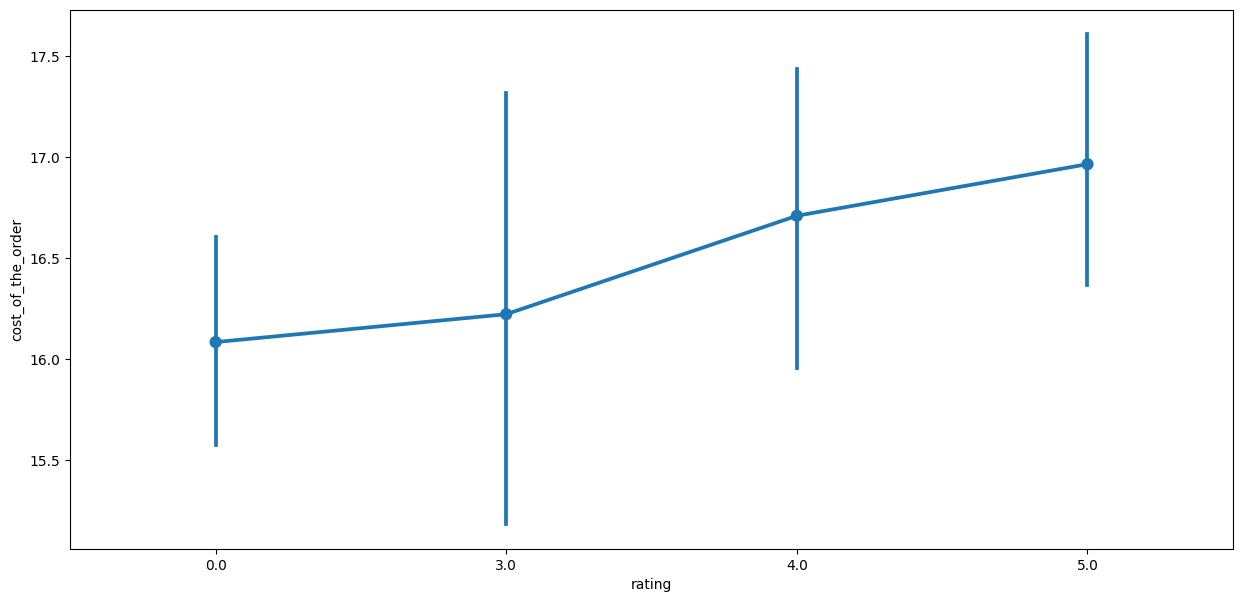

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data = df,x='rating',y= 'cost_of_the_order', hue=None);

 ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

Correlation among variables

<ipython-input-69-c34a136fd24d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


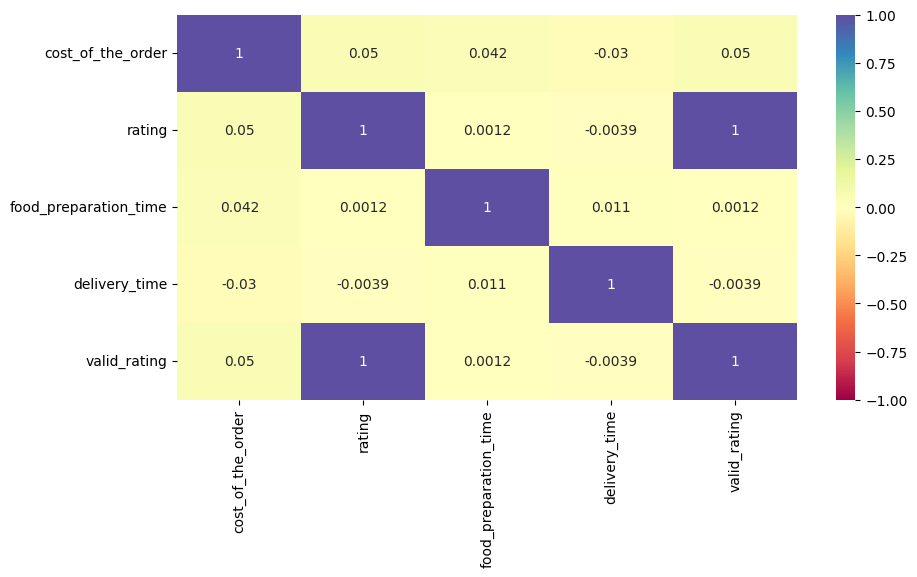

In [ ]:
# Plot the heatmap

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()




# Observations on the Heatmap and pairplot:
The heatmap shows very weak correlation between the variables.

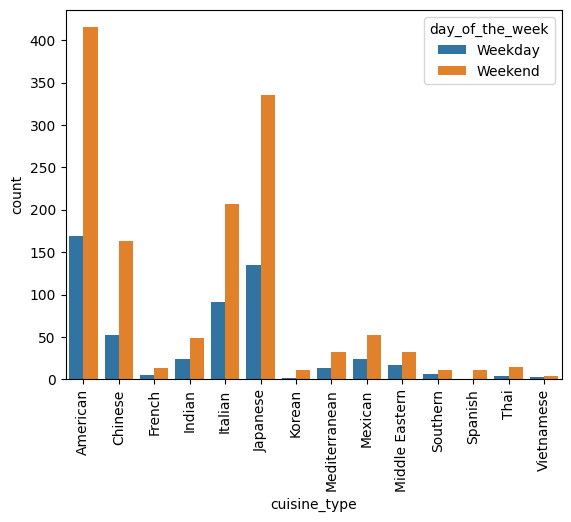

In [ ]:
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

 Observations on Orders per cuisine per day of the week:

The demand is low on weekdays. The popularity and demand are more in weekends.


 Day's of week against Cost of orders, food preparation time and delevery time.

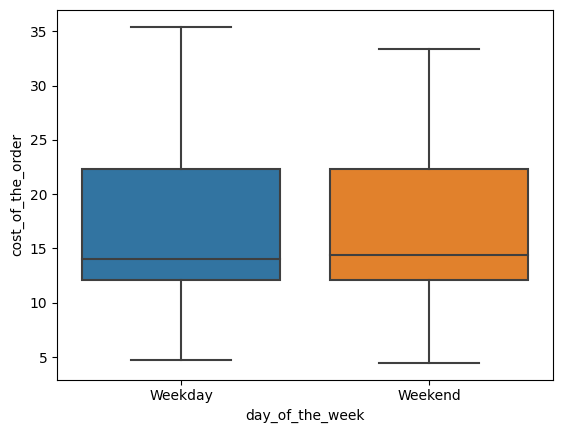

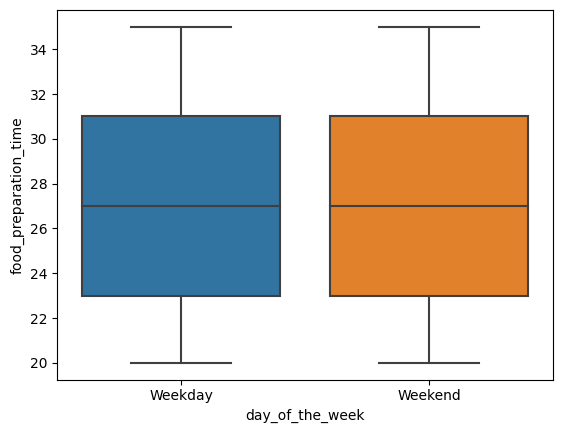

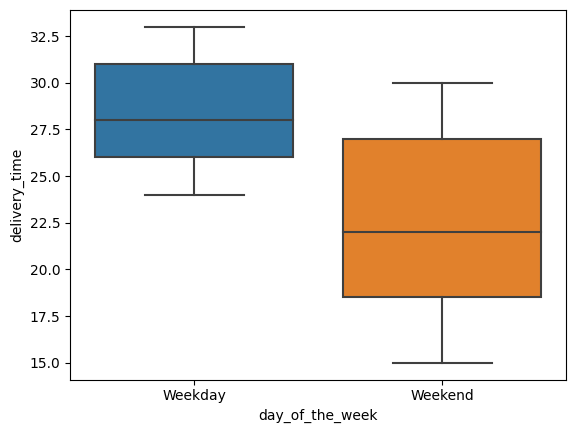

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

**Observation: days of week against cost of orders, food prepartion time and delivery time.**

Steady spread of observations irrespective of the day of the week, except for delivery time which generally takes longer during the weekdays as compared to  weekends. The median delivery time for weekends is around 22.5 minutes and  weekdays is about 28.5 minutes




 Company wants to provide a promotional offer in the advertisement of the restaurants.
 - The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. The restaurants fulfilling the criteria to get the promotional offer.


In [ ]:
 #Filter the rated restaurants

df_rated = df[df['rating'] != 'Not given'].copy()
# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
df_mean= df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

df_rating_count.head()

restaurant_name  rating
0                Shake Shack     219
1          The Meatball Shop     132
2          Blue Ribbon Sushi     119
3  Blue Ribbon Fried Chicken      96
4                       Parm      68

In [ ]:
# Write the code here
#Create a data set of Restaurants with a consideration of mean rating greater than 4. The rating eliminates all unrated rows in calculating the mean
df2 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4
#..and reset the index
df2.reset_index(inplace=True)
# Create a data set of Restaurants with a consideration of count of rating greate than 50.Equally in this case unrated orders are not considered.
df3 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50
#..and reset the index
df3.reset_index(inplace=True)
# Create a set of Restaurants that meet both conditions using merge
qualified_restaurants = pd.merge(df3[df3['rating']== True], df2[df2['rating']== True],on ='restaurant_name')
# Return the set of qualified restaurants only
qualified_restaurants





restaurant_name  rating_x  rating_y
0  Blue Ribbon Fried Chicken      True      True
1          Blue Ribbon Sushi      True      True
2                Shake Shack      True      True
3          The Meatball Shop      True      True

** Observations**:


*  Blue Ribbon Fried Chicken
*  Blue Ribbon Sushi
*  Shake Shack
*  The Meatball Shop

These four restaurants qualify for the promotional offer because they have rating count of more than 50 and the average rating greater than  4.  



In [ ]:
#function to determine the revenue
def net_revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(net_revenue)
df.head()
#total_Net_Rev = df['Revenue'].sum()
#print("Total net revenue is",round (total_Net_Rev, 2),'dollars')

 ## Write the apprpriate column name to compute the revenue


order_id customer_id            restaurant_name cuisine_type  \
0  1477147      337525                    Hangawi       Korean   
1  1477685      358141  Blue Ribbon Sushi Izakaya     Japanese   
2  1477070       66393                Cafe Habana      Mexican   
3  1477334      106968  Blue Ribbon Fried Chicken     American   
4  1478249       76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0              30.75         Weekend     0.0                     25   
1              12.08         Weekend     0.0                     25   
2              12.23         Weekday     5.0                     23   
3              29.20         Weekend     3.0                     25   
4              11.59         Weekday     4.0                     25   

   delivery_time  valid_rating  total_time  total_prep_time  Revenue  
0             20           0.0          45               45   7.6875  
1             23           0.0          48               48   1.8120  
2             28           5.0          51               51   1.8345  
3             15           3.0          40               40   7.3000  
4             24           4.0          49               49   1.7385

In [ ]:
total_Net_Rev = df['Revenue'].sum()
print("Total net revenue is",round (total_Net_Rev, 2),'dollars')

 # Write the apprpriate column name to compute the revenue

Total net revenue is 6166.3 dollars


Net Revenue= 6166.3 dollars




In [ ]:
 #Write the code here
# Create a new column to hold the computed value for total time required
df['total_prep_time'] = df['food_preparation_time']+df['delivery_time']
# Review to confirm the new column
df.head()

order_id customer_id            restaurant_name cuisine_type  \
0  1477147      337525                    Hangawi       Korean   
1  1477685      358141  Blue Ribbon Sushi Izakaya     Japanese   
2  1477070       66393                Cafe Habana      Mexican   
3  1477334      106968  Blue Ribbon Fried Chicken     American   
4  1478249       76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0              30.75         Weekend     0.0                     25   
1              12.08         Weekend     0.0                     25   
2              12.23         Weekday     5.0                     23   
3              29.20         Weekend     3.0                     25   
4              11.59         Weekday     4.0                     25   

   delivery_time  valid_rating  total_time  total_prep_time  
0             20           0.0          45               45  
1             23           0.0          48               48  
2             28           5.0          51               51  
3             15           3.0          40               40  
4             24           4.0          49               49

In [ ]:
#Compute the percentage of orders taking more than 60 minutes
total_observations = df['total_prep_time'].count()
ordertime_above60 = df['total_prep_time'][df['total_prep_time']> 60].count()

percent_above60 = round((ordertime_above60/total_observations)*100,2)
percent_above60


10.54

In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
sns.boxplot(data=df, x = 'food_preparation_time')
plt.show()
sns.boxplot(data=df, x = 'delivery_time')
plt.show()

df['total_time'] = df['food_preparation_time'] + df['delivery_time']
print(df.head)






NameError: name 'sns' is not defined

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['food_preparation_time'].mean()),
     'minutes')
round(df.groupby(['day_of_the_week'])['food_preparation_time'].mean().reset_index())







The mean delivery time on weekdays is around 27 minutes


day_of_the_week  food_preparation_time
0         Weekday                   27.0
1         Weekend                   27.0

In [ ]:
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')
round(df.groupby(['day_of_the_week'])['delivery_time'].mean().reset_index())



The mean delivery time on weekdays is around 28 minutes


day_of_the_week  delivery_time
0         Weekday           28.0
1         Weekend           22.0

Observations:
- The Food-Hub orders are delivered quicker in weekends than on weekdyas.

- The average time on weekdays delevery is 28 minutes.

The average time on weekends delivery is 22 minutes.

**Summary and Recomendations**

- FoodHub is a food aggregator company based in NYC which provides access to different restaurants
through their smartphone app.  FoodHub wants to use it’s consumer data to gain insight into
consumer behavior and demand to enhance their behavior.
 -  Key Takeaways:
    - 71% of the orders are placed during the weekend, and only 29% during the weekdays
    -  American, Japanese, Italian, and Chinese are the popular cuisines that are ordered
    -  39% of the customers don’t provide any rating feedback
    -  Mean order price is around $16.50, the average delivery time is 24.16 minutes.
    -  Weekend delivery time is about 6 minutes less than weekdays
    -  Correlation among variables are very weak.
     - Total net revenue is $6166.30

- Recommendations
  -  39% of customers do not provide any feedback, this presents a large gap in the data.  This
needs to be further explored and encourage customers to participate in providing feedback
 -  Cuisines with the highest ratings are rarely ordered compared other which has a lesser rating.  
Cuisines with high ratings should be highlighted to increase orders in these categories
 -  Number of weekday orders are very low compared to weekend orders.  This should be
investigated on why the demand is more on weekend than weekdays through some customer
survey